# Analysis Of IT Job Market In EU (2020)

## 1. Introduction

Anonymous survey was conducted with IT specialists from different regions of EU main focus on Germany. The survey has been conducted for 2018-2019-2020 years and in 2020 as many as 1253 respondants submitted their anwsers. With the given data analysis we want to gain insights into IT Job Market in general based on the trends we observe throughout the years with the main focus on 2020. 

Below is the link to survey file which was handed out to the participants and from which the data was collected: 
https://docs.google.com/forms/d/e/1FAIpQLSdPDpjEN98tazCLOQ7xxgK84DZeanC8wI_akPyKOeW3HwBhuA/viewform

The data used for the explorartory data analysis can be found on the link below:

https://www.kaggle.com/code/mousaalrefaei/eda-it-salary-survey-2020/data

The main questions I will aim to anwser during the Data exploration and visualisation are: 
***********************************************
    1.Which are the most popular positions for 2020? How have they changed from 2019-2018? 
***********************************************   
    2.Which positions have the highest salaries in 2020? (top compensated position and its specificities.)
***********************************************
    3.What are the Employment trends in IT field for 2020 ?
***********************************************
    4. What is the most work experience in the field as of 2020?How does experience affect salary?
***********************************************
    6. Which was the most popular city? How has the trend changed from last year?
***********************************************
    7. What is the make up of the IT job market based on gender and age?   
   ***********************************************
    8. Does gender affect the salary? 
   ***********************************************
    9. Does expereince level affect seniority level position?
   ***********************************************
    10.How age affects the seniority level position?
   ***********************************************
    11.which sized company has the highest salaries?
   ***********************************************
    12.Which are the top_5 business sectors It professionals work at? How are salaries distributed within the business types?
   ***********************************************
    13.How many people lost jobs or changed jobs due to covid?
   ***********************************************
    14.Which were the main companies that had to let employees go due to covid?
   ***********************************************
    15.Which positions were let go mainly due to covid? and at what seniority level.
   ***********************************************
    16.top 10 Most popular programming languages in 2020 and their average salaries.
    

I will use Regression analysis to find out which factors have the highest influence on the salary of IT professional. What is more I will use machine learning techniques to build a model which will predict approximate salary for IT professionals and try to illustrate my findings using graphs and anwser questions mentioned above.


## 2. Data Import and Cleaning

First we read the data and import necessary liabraries for data analysis. We take a overall look at the dataset and find the values we want to use. 

### 2.1 Data Import

Here we import the data and all the necessary Libraries required for respective data analysis

In [3]:
import pandas as pd #import to work on the dataframe 
import warnings #Import to make sure that warning msgs are ignored 
import matplotlib.pyplot as plt #Liabrary for plotting data
import seaborn as sns #Liabrary for visualization
import numpy as np# Math Lib for math operations

from sklearn.model_selection import train_test_split#Model splitting and testing
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')

In [4]:
df_2020 = pd.read_csv('IT_Salary_Survey_EU_2020.csv')#read csv file
df_2019 = pd.read_csv('T Salary Survey EU 2019.csv')
df_2018 = pd.read_csv('IT Salary Survey EU 2018.csv')

After taking initial look at the dataset we see that many columns have long names we can rename them ro make them shorter. We drop columns we do not need.


### 2.2 Data Preparation

We will mainly focus on the data for year 2020. In the section below we will clean the dataset, remove or fill in the null values, convert the dataset objects to the types that are required for us to analyze the data. 

In [5]:
print(df_2020.columns)

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

First thing we see is that column names are too long or have spaces at the end of the name. 
Second thing we see is that we will not need all respective columns to anwser questions for the given data analysis so we can remove them. 

In order to see how COVID affetcted the job market we do not need this two columns, so we will remove them : 

'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',

'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'

We also are not interested in the given columns to see how the salaries changed for respective positions from years before we will use the 2019 and 2018 datasets so we can remove given columns: 
 'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       
 'Annual bonus+stocks one year ago. Only answer if staying in same country',

In [6]:
#Many Columns in the dataset have long names below is the code to rename them 
df_2020.rename(columns = {
                    'Total years of experience': 'Experience',
                    'Position ':'Position',    
                    'Years of experience in Germany':'Exp.Germany',
                    'Your main technology / programming language':'Main_Lang/Tech',
                    'Other technologies/programming languages you use often':'Other_Lang/Tech',
                    'Yearly brutto salary (without bonus and stocks) in EUR':'Annual_Salary',
                    'Yearly bonus + stocks in EUR':'Stock_Bonuses',
                    'Number of vacation days':'Vacation',
                    'Main language at work':'Language',
                    'Have you lost your job due to the coronavirus outbreak?':'lost_job_covid'}, inplace = True)

In [7]:
#removing unnecessary columns from the dataset
df_2020 = df_2020.drop(columns = 
                         ['Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
                         'Annual bonus+stocks one year ago. Only answer if staying in same country',
                         'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR',
                         'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week'], 
                        axis = 0)

#### 2.2.1 Cleaning Null Values 

We need to analyse the null values in the columns: 

In [8]:
df_2020.isna().sum()

Timestamp              0
Age                   27
Gender                10
City                   0
Position               6
Experience            16
Exp.Germany           32
Seniority level       12
Main_Lang/Tech       127
Other_Lang/Tech      157
Annual_Salary          0
Stock_Bonuses        424
Vacation              68
Employment status     17
Сontract duration     29
Language              16
Company size          18
Company type          25
lost_job_covid        20
dtype: int64

We see that there is a small number  of null values in respective columns: Age, Gender,Position, Experience, Exp.Germany, Seniority Level,Other lang/Tech, Vacation,Employment status, Contract Duration, Language, Company size, Company type, lost job covid. We can ignore this empty cells since there is still sufficient data to analyse, nevertheless rest of the columns have slarge number of null values we need to analyse each and make respective adjustements.

In [9]:
#Created a copy of initial dataset so that it will be intact
df_2020_copy = df_2020.dropna(subset = ['Position','Age','Gender','Experience','Exp.Germany',
                                        'Seniority level','Vacation','Employment status','Сontract duration',
                                        'Language','Company size','Company type','lost_job_covid'])

In [10]:
df_2020_copy.isna().sum()

Timestamp              0
Age                    0
Gender                 0
City                   0
Position               0
Experience             0
Exp.Germany            0
Seniority level        0
Main_Lang/Tech        92
Other_Lang/Tech      128
Annual_Salary          0
Stock_Bonuses        345
Vacation               0
Employment status      0
Сontract duration      0
Language               0
Company size           0
Company type           0
lost_job_covid         0
dtype: int64

In [11]:
no_main_lang=df_2020_copy[pd.isna(df_2020_copy['Main_Lang/Tech'])]
positions_without_lang = no_main_lang.Position.value_counts()[:10]
positions_without_lang

Product Manager      25
QA Engineer          12
DevOps                9
Designer (UI/UX)      8
Software Engineer     5
Backend Developer     3
Data Scientist        3
Data Engineer         2
IT Manager            2
Head of IT            1
Name: Position, dtype: int64

In [12]:
no_other_lang=df_2020_copy[pd.isna(df_2020_copy['Other_Lang/Tech'])]
positions_no_other_lang = no_other_lang.Position.value_counts()[:10]
positions_no_other_lang

Product Manager          19
Software Engineer        18
QA Engineer              15
Backend Developer        14
Designer (UI/UX)         10
Frontend Developer       10
DevOps                    3
Data Scientist            2
Mobile Developer          2
Engineering Team Lead     1
Name: Position, dtype: int64

We see that positions which do not have Main programming language ro Technology are mainly Managerial or design type of positions for example : UI/UX Designer, Agile Coach, Head of IT etc. 

Positions which do not have other programming languages include some same ones as the ones who do not have the main language but there is also a difference for example, backend developer, Frontend developer, they might have the main language but do not have any additional language knowledge. 

Based on the analysis above we can say that in the case where there is no main programming language it means that the relative position does not require such technical skills whereas in case where there is no additional languages or skills it might mean that for the given position the person has only main languages and does not hold any additional knowledge in languages. 

In my view we can add value of "NONE" to the empty cells in the given columns which will illustrate that respective persons do not know and require any or any additioanl tech knowledge. 

In [13]:
df_2020_copy['Other_Lang/Tech']=df_2020_copy['Other_Lang/Tech'].fillna('NONE')
df_2020_copy['Main_Lang/Tech']=df_2020_copy['Main_Lang/Tech'].fillna('NONE')

Now that we filled or removed all null values from columns only column left with null values is "Stock_Bonuses" not having any data in the given column means that person did not recieve any stocks or bonuses thus it would be logical to replace the null values with 0's 

In [14]:
df_2020_copy['Stock_Bonuses']=df_2020_copy['Stock_Bonuses'].fillna('0')

No more null values in the dataset

#### 2.2.2 Converting Types 

In the given sub chapter we will look at the data types of the objects in the dataset and convert them to the ones that are useful for our analysis

In [15]:
df_2020_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1099 entries, 0 to 1252
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1099 non-null   object 
 1   Age                1099 non-null   float64
 2   Gender             1099 non-null   object 
 3   City               1099 non-null   object 
 4   Position           1099 non-null   object 
 5   Experience         1099 non-null   object 
 6   Exp.Germany        1099 non-null   object 
 7   Seniority level    1099 non-null   object 
 8   Main_Lang/Tech     1099 non-null   object 
 9   Other_Lang/Tech    1099 non-null   object 
 10  Annual_Salary      1099 non-null   float64
 11  Stock_Bonuses      1099 non-null   object 
 12  Vacation           1099 non-null   object 
 13  Employment status  1099 non-null   object 
 14  Сontract duration  1099 non-null   object 
 15  Language           1099 non-null   object 
 16  Company size       1099 

In [16]:
#We remove strings and characters from numerical columns
df_2020_copy['Experience']= df_2020_copy['Experience'].str.strip()
df_2020_copy['Experience']= df_2020_copy['Experience'].str.replace(',','')
df_2020_copy['Experience']= df_2020_copy['Experience'].replace(['1 (as QA Engineer) / 11 in total'],'')
df_2020_copy['Experience']= df_2020_copy['Experience'].str.replace('15 thereof 8 as CTO','15')
df_2020_copy['Experience']= df_2020_copy['Experience'].str.replace('less than year','0.1')

df_2020_copy['Exp.Germany']= df_2020_copy['Exp.Germany'].replace('4 (in Switzerland), 0 (in Germany)','0')
df_2020_copy['Exp.Germany']= df_2020_copy['Exp.Germany'].replace('< 1','0.1')
df_2020_copy['Exp.Germany']= df_2020_copy['Exp.Germany'].replace('4 month','4')
df_2020_copy['Exp.Germany']= df_2020_copy['Exp.Germany'].replace('3 months','3')
df_2020_copy['Exp.Germany']= df_2020_copy['Exp.Germany'].replace('3 (in Poland)','0')
df_2020_copy['Exp.Germany']= df_2020_copy['Exp.Germany'].replace('-','0')
df_2020_copy['Exp.Germany']= df_2020_copy['Exp.Germany'].replace('less than year','0.1')
df_2020_copy['Exp.Germany']= df_2020_copy['Exp.Germany'].str.replace(',','.')


df_2020_copy['Stock_Bonuses']= df_2020_copy['Stock_Bonuses'].replace('bvg only','0')
df_2020_copy['Stock_Bonuses']= df_2020_copy['Stock_Bonuses'].replace('15000+-','15000')
df_2020_copy['Stock_Bonuses']= df_2020_copy['Stock_Bonuses'].replace('Na','0')
df_2020_copy['Stock_Bonuses']= df_2020_copy['Stock_Bonuses'].replace('-','0')
df_2020_copy['Stock_Bonuses']= df_2020_copy['Stock_Bonuses'].replace('Not sure','0')
df_2020_copy['Stock_Bonuses']= df_2020_copy['Stock_Bonuses'].str.replace('depends','0')

#Vacation in itself at first glance might seem numerical but there are categorical values 
#like Unlimited and some respondents did not know how many vacation days they had  

df_2020_copy['Vacation']= df_2020_copy['Vacation'].replace('30 in contract (but theoretically unlimited)','365')
df_2020_copy['Vacation']= df_2020_copy['Vacation'].replace('23+','24')
df_2020_copy['Vacation']= df_2020_copy['Vacation'].replace('~25','25')
df_2020_copy['Vacation']= df_2020_copy['Vacation'].replace('30+','31')
df_2020_copy['Vacation']= df_2020_copy['Vacation'].replace('24 labour days','24')
df_2020_copy['Vacation']= df_2020_copy['Vacation'].replace('unlimited','Unlimited')
df_2020_copy['Vacation']= df_2020_copy['Vacation'].replace('Unlimited ','Unlimited')
df_2020_copy['Vacation']= df_2020_copy['Vacation'].replace('unlimited ','Unlimited')
df_2020_copy.drop(df_2020_copy.index[df_2020_copy['Vacation'] == '(no idea)'], inplace = True)
df_2020_copy['Vacation']= df_2020_copy['Vacation'].replace('Unlimited','365')
df_2020_copy.drop(df_2020_copy.index[df_2020_copy['Experience'] == ''], inplace = True)

We see that there is only one respondant who does not know how many vacation days he has we can remove the given value and turn the vacations column into numeric category by giving the Unlimited vacations the highest amount of days per yer 365

In [17]:
df_2020_copy['Experience'] = df_2020_copy['Experience'].astype(float)
df_2020_copy['Exp.Germany'] = df_2020_copy['Exp.Germany'].astype(float)
df_2020_copy['Stock_Bonuses'] = df_2020_copy['Stock_Bonuses'].astype(float)
df_2020_copy['Annual_Salary'] = df_2020_copy['Annual_Salary'].astype(float)
df_2020_copy['Vacation'] = df_2020_copy['Vacation'].astype(float)

As a result we have numeric categories based on the given features like: Age, Experience, Experience Germany, Annual Salary, Stocks and bonusses, Vacations

All other features are categorical and for the purpose of our analysis we will assign them dummy variables.

For the purpouse of future analysis we need to combine bonuses and salaries and create a new column named : 

In [18]:
df_2020_copy['Total_Salary'] = df_2020_copy['Annual_Salary'] + df_2020_copy['Stock_Bonuses'] 

#### Summary After Cleaning 

After data cleaning we have removed all null and unnecessary values from the dataset, we have filled in empty cells where we saw fit and converted numeric features into Float types where it was needed. 

We are left with 1097 values to analyse for the yaer 2020

## 3 Data Exploration & Visualization  

After cleaning the dataset I will try to take a broader look at the categories and their relationship with each other and anwser some of the key questions asked at the beggining of this notebook.

Lets take a look at the cleaned dataset statistical values for general overview: 

In [19]:
df_2020_copy.describe()

,Age,Experience,Exp.Germany,Annual_Salary,Stock_Bonuses,Vacation,Total_Salary
count,1097.000000,1097.000000,1097.000000,1.097000e+03,1.097000e+03,1097.000000,1.097000e+03
mean,32.474020,8.800091,3.664722,5.274357e+05,4.572784e+06,30.890155,5.100219e+06
std,5.511725,5.274046,3.503372,1.509404e+07,1.509612e+08,30.708929,1.660552e+08
min,20.000000,0.000000,0.000000,1.000100e+04,0.000000e+00,0.000000,1.000100e+04
25%,29.000000,5.000000,1.000000,6.000000e+04,0.000000e+00,27.000000,6.035000e+04
50%,32.000000,8.000000,3.000000,7.000000e+04,0.000000e+00,28.000000,7.400000e+04
75%,35.000000,12.000000,5.000000,8.000000e+04,1.000000e+04,30.000000,9.100000e+04
max,66.000000,40.000000,30.000000,5.000000e+08,5.000000e+09,365.000000,5.500000e+09


In [20]:
df_2020_copy.describe(include=object)

,Timestamp,Gender,City,Position,Seniority level,Main_Lang/Tech,Other_Lang/Tech,Employment status,Сontract duration,Language,Company size,Company type,lost_job_covid
count,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097
unique,1094,3,104,137,20,239,512,8,3,13,5,56,10
top,25/11/2020 18:28:01,Male,Berlin,Software Engineer,Senior,Java,NONE,Full-time employee,Unlimited contract,English,1000+,Product,No
freq,2,928,606,348,499,168,127,1067,1044,905,399,690,1035


Based on the statistic given above we can make initial predictions about the dataset which we will visually display below. 

1) The most popular city is Berlin based on the respondants anwsers.

2) We see that Males take up the majority 

3) We see that "Software Engineer" is the most common position

4) We see that Senior is the most common Seniority Level

5) We see that Java is the most common programming language 

6) We see that in terms of Other tech and Lang None is the common anwser which might mean that people specilise in their Main languages and tech 

7) we see that Full-time and unlimited contracts are the most common. 

8) Main Language used is English 

9) Main type of company is Product which means that company is in the field of product developement and not service type company. 

As for numeric Data we see that : 
1) Average age is 32 and max age is 66 

2) In terms of experience we see that 8 years is the average experience and Maximum experience is 40 years, which shows that It field is relatively new and experience required is not high and we have people with 0 experience in the field also 

3) We also see that in terms of vacations employees have standard vacation days of 24-30 days per year, but there are employees who have unlimited vacation days. 

4) We also see that stocks and bonuses can be 0 meaning that not all employees migth have them (it could be denendant on seniority level) 

5) We see that for year 2020 (cleansed dataset) average Annual salary for employees in IT field is 527435


#### Survey Analysis 

In [21]:
average_sal_2019=df_2019['Yearly brutto salary (without bonus and stocks)'].mean()
average_sal_2018 =df_2018['Current Salary'].mean()
average_sal_2020 = df_2020['Annual_Salary'].mean()
print('2020 Average Salary: ', average_sal_2020, 'The number of respndants and questions',df_2020.shape)
print("2019 Average Salary: ", average_sal_2019,'The number of respndants and questions',df_2019.shape)
print('2018 Average Salary: ',average_sal_2018,'The number of respndants and questions',df_2018.shape)

2020 Average Salary:  80279042.57871509 The number of respndants and questions (1253, 19)
2019 Average Salary:  72562.21212121213 The number of respndants and questions (991, 23)
2018 Average Salary:  68381.76533333333 The number of respndants and questions (765, 14)


Based on the analysis above we see that number of respondants has increased for 2020, which can be attributed to the growing popularioty of IT field or that the survey was conducted for longer period of time and more participants were asked to be involved. 

The average salary change can not be analysed based on average fo each dataset, since number of respndants and their positions are different for each year. 

What we can conclude from the given analysis is that average salary in IT field is high and has the tendency to rise through years.

We can also see that for 2020 and 2019  number of questions asked was 23 (before cleaning the dataset 2020)  compared to 2018,where only 14 questins were asked to respondents.Questions added to 2019 were mainly connected to home office, salaries and bonuses for previous year,vacation days, company size and sector for year 2020 relevant questions were added concerning COVID 19. 


#### 3.1 Which were the top 20 positions in 2020? 



Text(0.5, 1.0, 'Top 20 Positions In 2020')

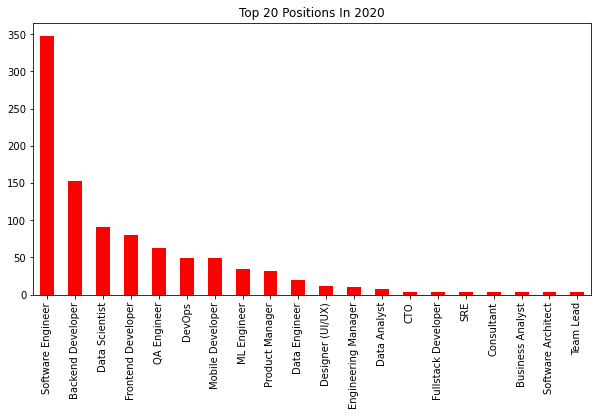

In [22]:
positionList = df_2020_copy['Position'].value_counts()[:20].sort_values(ascending=False)
positionList.plot(kind = 'bar', figsize = (10,5),color = 'red')
plt.title('Top 20 Positions In 2020')

What we see based on the given chart is that the most "Popular" position based on the survey is "Sofware Engineer", It is one of the broadest positions in IT world and you have broad skills and opportunities that might be the reason. As we see in our top 20 "Team Lead" has the last position, why ? It might be that many companies and dev teams do not have Team Leads and are managed by CTO s or are using Agile management. 
Two other most common positions are Backend and Frontend Devs, which is not surprising based on their skills and demand on the market.

We will look at the salaries for the top positions below and try to find if it has any correlation with popularity of positions. 

##### 3.1.1 How has the top 20 Positions have changed from 2019?

Text(0.5, 1.0, 'Top 20 Positions In 2019')

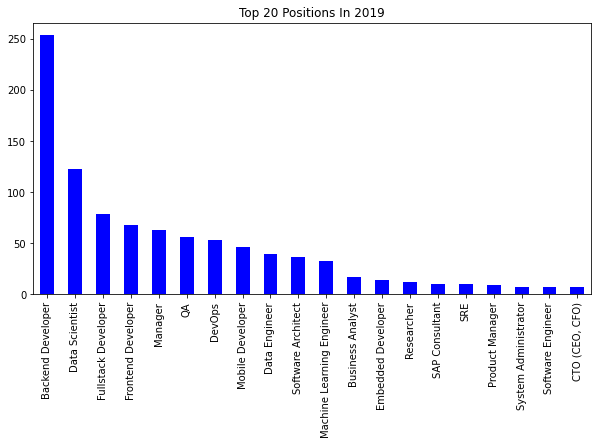

In [23]:
positionList = df_2019['Position (without seniority)'].value_counts()[:20].sort_values(ascending=False)
positionList.plot(kind = 'bar', figsize = (10,5),color = 'blue')
plt.title('Top 20 Positions In 2019')


Text(0.5, 1.0, 'Top 20 Positions In 2018')

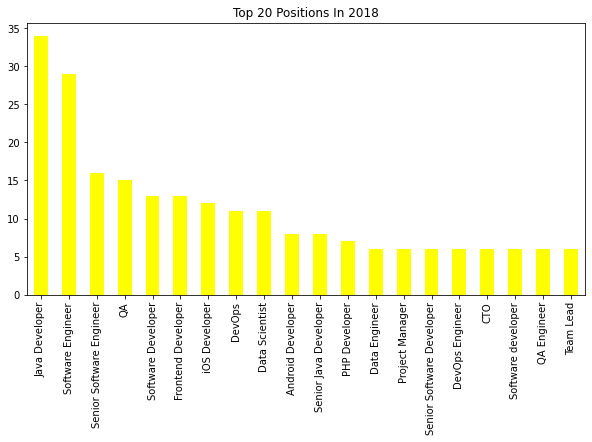

In [24]:
positionList = df_2018['Position'].value_counts()[:20].sort_values(ascending=False)
positionList.plot(kind = 'bar', figsize = (10,5),color = 'yellow')
plt.title('Top 20 Positions In 2018')

It is interesting to see how many positions are non technical and do not require the knowledge of any languages or technologies and what are the positions and respective salaries. 

In [25]:
no_lang=df_2020_copy[(df_2020_copy['Other_Lang/Tech']=='NONE')&(df_2020_copy['Main_Lang/Tech']=='NONE')]
no_main_lang = df_2020_copy[df_2020_copy['Main_Lang/Tech']=='NONE']
no_other_lang = df_2020_copy[df_2020_copy['Other_Lang/Tech']=='NONE']
no_lang.groupby('Position')['Annual_Salary'].mean()

Position
Account Managet                50000.000000
Agile Coach                    82000.000000
Backend Developer              60000.000000
Data Scientist                110000.000000
Data architect                 90000.000000
Designer (UI/UX)               63500.000000
DevOps                         76733.333333
Hardware Engineer              56000.000000
Head of IT                     80000.000000
IT Manager                     73000.000000
Localization producer          68500.000000
Product Manager                62031.875000
Project manager               130000.000000
Project manager               108000.000000
QA Engineer                    62833.333333
Recruiter                      70000.000000
Software Engineer              70000.000000
System Administrator           44000.000000
Systemadministrator            44000.000000
Technical account manager      57000.000000
Name: Annual_Salary, dtype: float64

Sofware Engineer is nowhere to be seen in the last years analysis, we can assume two things either the profession has become more popular for 2020 or that the survey did not include enough correspondents to show the results. 

We also see that Frontend and Backend Devs always are at the top of the list we might say that this is due to their ease of study, mainly in terms of enriched resources on the web and free and paid courses.

As data driven decision making and solutions are in demand and popular now and have been so in the past few years Data Scientists are also gaining popularity. 
Discrepancies in the two datasets migth also have risen from the fact that both have different number of datas and correspondents for each year.

#### 3.2 Highest paid positions in 2020?

Lets try analysing the top salaries and finding correlation between the top salaries and top 20 positions


In [26]:
top_20_salaries = df_2020_copy['Total_Salary'].groupby(df_2020_copy['Position']).sum().astype(int)
#since the numbers are high we use int to show the full number values
top_20_salaries.sort_values(ascending=False,inplace=True)
top_20_salaries.head(20)

Position
ML Engineer                    5502893001
Software Engineer                30468314
Backend Developer                12589274
Data Scientist                    8132000
Frontend Developer                6758258
QA Engineer                       4464200
DevOps                            4242275
Mobile Developer                  3880812
Data Engineer                     2938000
Product Manager                   2804920
Engineering Manager               1163000
CTO                                826000
Designer (UI/UX)                   692800
Data Analyst                       595200
Freelance AI lead / advisor        400000
Software Architect                 367000
Manager                            330000
Consultant                         323000
Business Analyst                   268500
Head of Engineering                260000
Name: Total_Salary, dtype: int64

The only position that does not correlate with the above findings is the ML engineer which shows us that it is not that common a position and has the highest salaries and we can predict that it will only gain more popularity. 

We see that ML Engineer has the Highest salary and is not in the list of top 20 positions, meaning that it is not due to the number of ML Engineers interviewd the sallary is high for the given position in General. Based on the market trends and demand for Machine Learning specialists it seems to be correct. 

Software engineer has the second highest salary but is also one of the most common positions in the dataset, thus we can not make any predictions as to why it might be due to the number of Software Engineers interviwed or is it high in general. 
To get the better understanding of the total salaries we can see the avarage salary for each position. 


In [27]:
top_20_salaries_AVG = df_2020_copy['Total_Salary'].groupby(df_2020_copy['Position']).mean().astype(int)
top_20_salaries_AVG.sort_values(ascending=False,inplace=True)
top_20_salaries_AVG.head(20)

Position
ML Engineer                         157225514
Freelance AI lead / advisor            400000
Manager                                330000
Sales                                  210000
CTO                                    206500
Software Sales                         170000
Architect                              170000
Cloud Architect                        160000
Project manager                        150000
Teamlead                               150000
Data Engineer                          146900
BI Consultant SAP/ Data Engineer       142000
Chief Research Officer                 140000
DBA                                    134000
Head of Engineering                    130000
Tech Leader                            130000
ERP Consultant                         130000
Support Engineer                       127000
Solutions Architect                    125000
Solution Architect                     125000
Name: Total_Salary, dtype: int64

Analysing the avarage salaries shows that ML Engineers salaries are the highest, but compared to sum of total saalries here we see that Freelance AI Lead/ Advisor takes the second place thus we can assume that Software Engineers is not the second hisghest paid position and it was on the second position based on its popularity

Since ML engineers have the higshet salary for both in terms of avarage and total earnings we can take a deeper look at the given position and see how many respondants were occupied on the given position.



##### 3.2.1 ML Engineers

1. How Popular is the given position? 

2. Which language is the most popular for the given position? 

3. Which Gender is dominant for the given position? 


In [28]:
ML_ENGINEER = df_2020_copy[df_2020_copy['Position']== 'ML Engineer']


In [29]:
len(ML_ENGINEER)

35

We see that there are not many ML Engineers in the dataset of 1099, which means that this is up and comming position that is just gaining the popularity. 

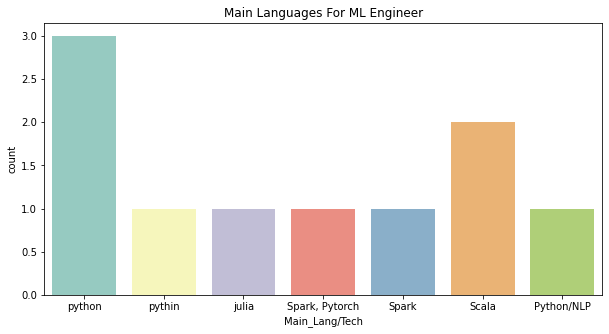

In [30]:
ML_ENGINEER['Main_Lang/Tech'].value_counts()
plt.figure(figsize=(10,5))
plt.title("Main Languages For ML Engineer")
sns.countplot(ML_ENGINEER['Main_Lang/Tech'].sort_values(ascending= False)[:10], palette="Set3")
plt.show()

We see that 'Python' is the most used language by ML Engineers

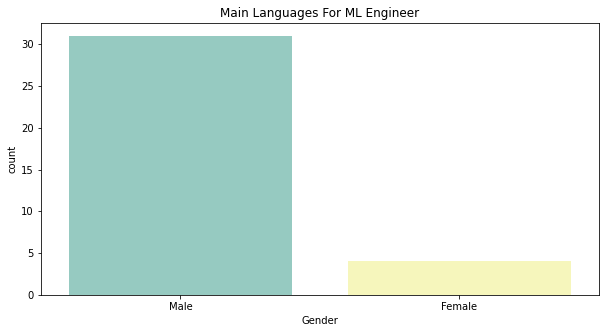

In [31]:
plt.figure(figsize=(10,5))
plt.title("Main Languages For ML Engineer")
sns.countplot(ML_ENGINEER['Gender'], palette="Set3")
plt.show()

We see that it is predominantly Male position.

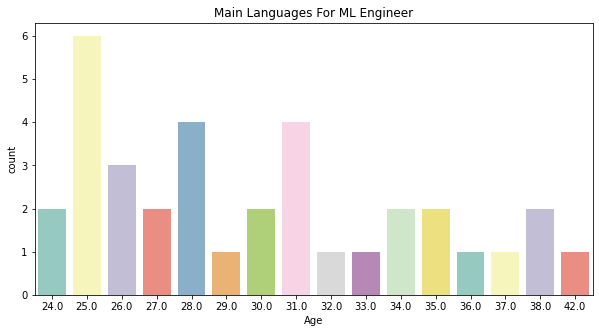

In [32]:
plt.figure(figsize=(10,5))
plt.title("Main Languages For ML Engineer")
sns.countplot(ML_ENGINEER['Age'].sort_values(ascending = False), palette="Set3")
plt.show()

We see that a lot of 25, 28, 31 year olds are working as ML Engineers.

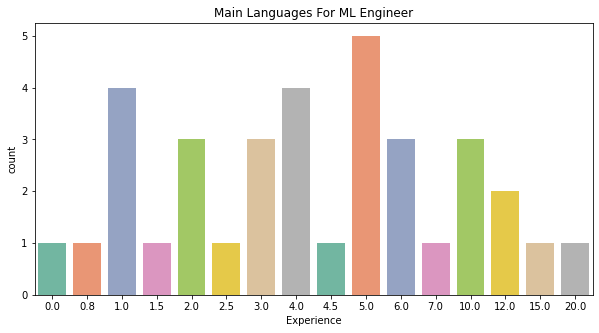

In [33]:
plt.figure(figsize=(10,5))
plt.title("Main Languages For ML Engineer")
sns.countplot(ML_ENGINEER['Experience'].sort_values(ascending = False), palette="Set2")
plt.show()

In terms of experience we see that 5 years is most common experience for ML engineers. Data Scientist jobs have been gaining popularity in recent years and more specific roles like ML engineers have emerged only recently thus the experience in the field is relatively low. 

#### 3.3 Employment  Trends In 2020 for IT:

1) What type of contracts are most common?

2) What are the most common and possible employment types? 

In [34]:
df_2020_copy['Employment status'].value_counts()[:20]

Full-time employee                                                     1067
Self-employed (freelancer)                                               19
Part-time employee                                                        6
working student                                                           1
Working Student                                                           1
full-time, but 32 hours per week (it was my request, I'm a student)       1
Werkstudent                                                               1
Founder                                                                   1
Name: Employment status, dtype: int64

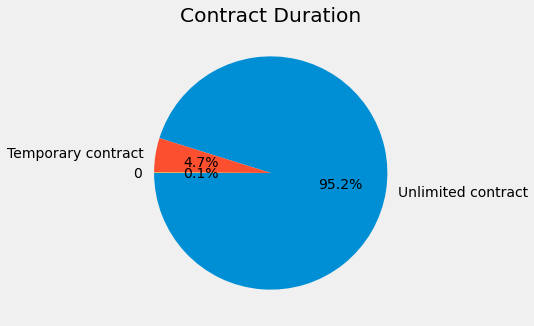

In [35]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.title("Contract Duration")
g = plt.pie(df_2020_copy['Сontract duration'].value_counts(), labels=df_2020_copy['Сontract duration'].value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

We see that in our dataset almost all the respondants are Full-time employees of the company and that only the small amount make up the people under temporary contract meaning the freelancers 

Since IT is an agile and flexible industry where talent is valued we see such cases where employment type says : work student, full-time but working student 

#### Overall view of IT market 2020 

We see that 95% of the respondants are under unlimited contract in IT field, 1067 from /1099 are full-time employees in an organization, who occupy different levels of position. The most popular among them is Software engineering, Data analysis, Backend and Frontend Development.

Organisations today see the value in talent acquisition and management and that might be the reason for high full-time and unlimited contracts in IT field.

In 2019 Software Engineering was not part of top 20 not even part of top 10 positions, we see that this has changed and in 2020 number of Software engineers exceeds backend developers. This might be caused due to the fact that a lot of Backend Developers started using term software engineer and not due to the change in the position itself. 

IT field is predominantely male industry due to various factors but the 2020 data shows that females are emerging and finding positions in the field. The idea is reinforced by the 2018 and 2019 datasets respectively. 

Pay gap between genders exsist as we saw from Software Engineers salary analysis, where for same experience and position females in general recieved less salary than males. 

#### 3.4 What is the most common work expereience in the IT Field?

In any field of occupation relevant work experience has certain affect on the salary. In the survey conducted respondants were asked for their work experience thus we can analyse how the work experience affects the salary of IT professionals.  

at the beggining of the given section we saw that the minimum work experience was 0 and maximum was 40. It is interesting to see how is the work expereince distributed, which we will se based on the chart below: 

<AxesSubplot:title={'center':'Top Experience Levels'}, xlabel='experience', ylabel='Count'>

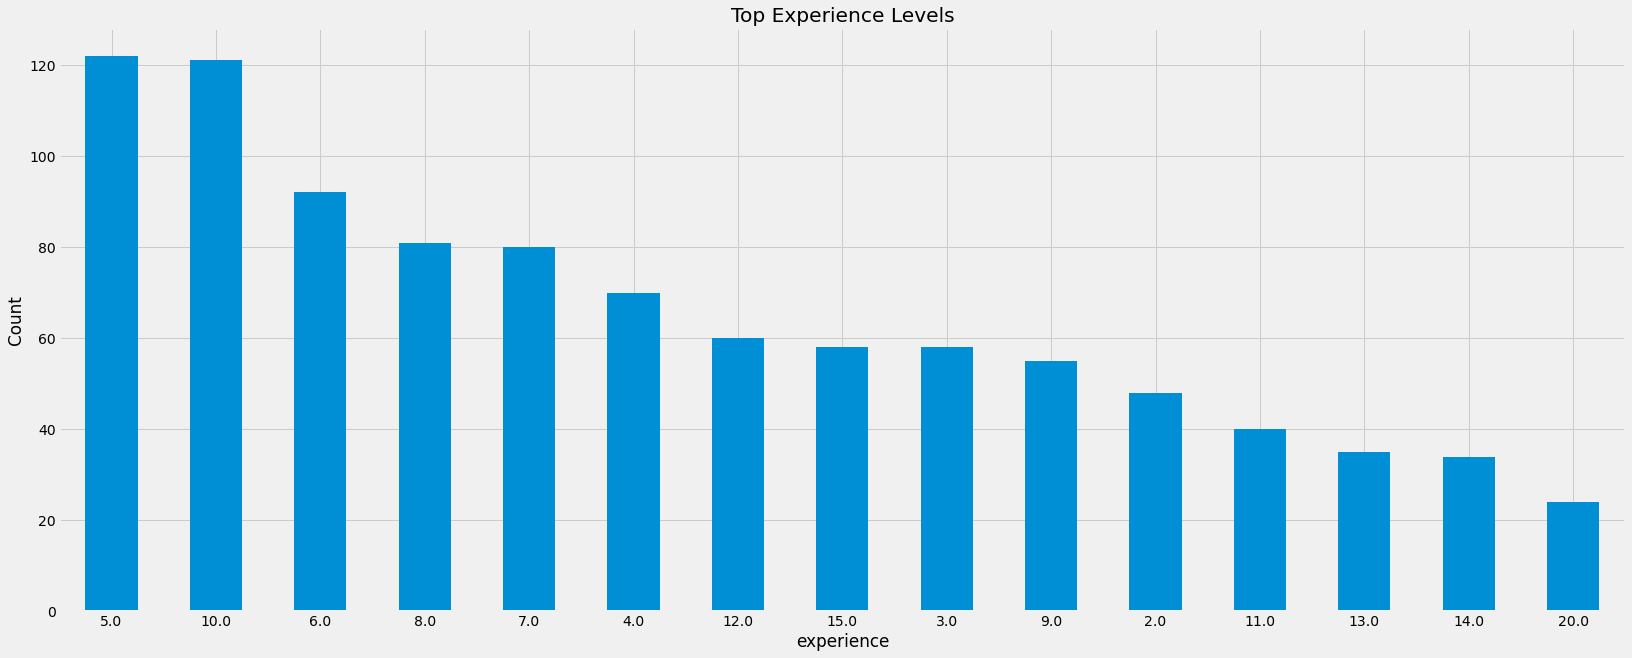

In [36]:
#The most common years in terms of experience 
df_2020_copy['Experience'].value_counts()[:20].plot.bar(rot=0,figsize = (25,10),xlabel='experience',ylabel='Count',title='Top Experience Levels')


We see that the most common experience level is 5 years and least is 20 years It shows us that the IT is relatively new field. 

We also know that maximum experience  for the dataset is 40 years it is interesting  to dive more deep into the given variable: 

##### Detailed look at respondant with 40+ years of expereince:

In [37]:
df_2020_copy[df_2020_copy['Experience']==40]

,Timestamp,Age,Gender,City,Position,Experience,Exp.Germany,Seniority level,Main_Lang/Tech,Other_Lang/Tech,Annual_Salary,Stock_Bonuses,Vacation,Employment status,Сontract duration,Language,Company size,Company type,lost_job_covid,Total_Salary
59,24/11/2020 11:33:51,66.0,Male,Munich,Software Engineer,40.0,4.0,Lead,ruby on rails,"Javascript / Typescript, Ruby, SQL",70000.0,0.0,30.0,Full-time employee,Unlimited contract,German,51-100,Product,No,70000.0


We see that this person is 66 years old (maximum age in the dataset), and that in Main lang and tech he indicated Ruby On Rails which is an outdated web dev. framework. Which shows why he is still in the field and occupies the senior position. It is hard to rewrite legacy code and if it was written on Ruby his expertise would be useful for his company.

In [38]:
df_2020_copy[df_2020_copy['Main_Lang/Tech']=='ruby on rails']

,Timestamp,Age,Gender,City,Position,Experience,Exp.Germany,Seniority level,Main_Lang/Tech,Other_Lang/Tech,Annual_Salary,Stock_Bonuses,Vacation,Employment status,Сontract duration,Language,Company size,Company type,lost_job_covid,Total_Salary
59,24/11/2020 11:33:51,66.0,Male,Munich,Software Engineer,40.0,4.0,Lead,ruby on rails,"Javascript / Typescript, Ruby, SQL",70000.0,0.0,30.0,Full-time employee,Unlimited contract,German,51-100,Product,No,70000.0


#### 3.4 Which is the hub for IT Professionals? 

<AxesSubplot:>

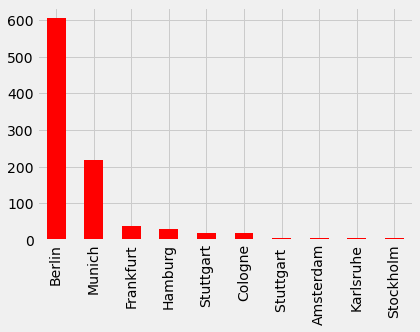

In [39]:
cities = df_2020_copy['City'].value_counts().sort_values(ascending= False)
city_pop = cities.head(10)
city_pop.plot(kind='bar',color='red')

Since the respondandts are mainly From Germany we see that the most Cities in the dataset are German and the top city is Berlin, Munich Frankfurt.This might be the case since Berlin is the capital and the main international companies are centered there. 

<AxesSubplot:>

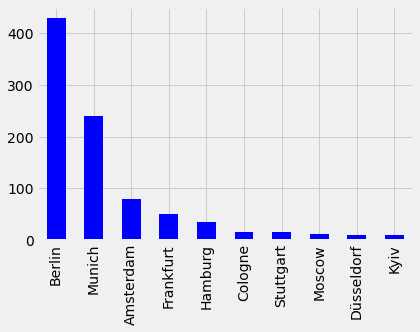

In [40]:
cities = df_2019['City'].value_counts().sort_values(ascending= False)
city_pop = cities.head(10)
city_pop.plot(kind='bar',color='blue')

We see that popularity of berlin and munich has not changed from 2019, but amsterdam went lower on the list it could be due to lack of respondants from amsterdam or due to other reasons. 

#### 3.5 What is the make up of the IT Job Market in terms of Gender and Age?

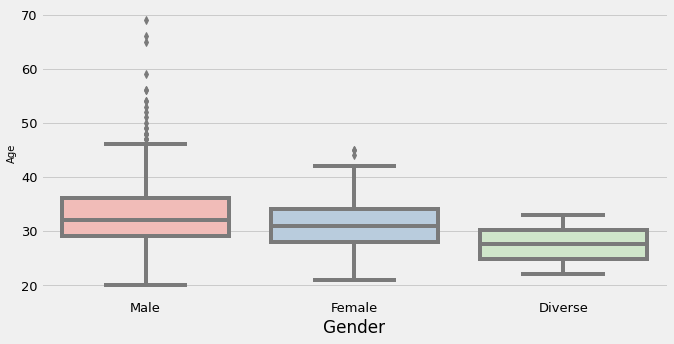

In [41]:
#lets analyse the full dataset so we have better understanding of the data, 
#since in the clened data we do not have enough information about Diverse background people
plt.figure(figsize=(10,5))
sns.boxplot(x='Gender',y='Age',data=df_2020,palette='Pastel1')
plt.xticks(fontsize=13)
plt.xlabel("Gender")
plt.yticks(fontsize=13)
plt.ylabel("Age",fontsize=10)
plt.show()

We see that Males are represented mainly within the age range of 30-40 and have many outliers that are above the age of 50, for example the maximum age representative of age 66 is Male. This could be attributed to the fact that Women are new in the IT field and in the past  it was percieved that only man could be IT professionals, thus the age gap still exists. 

We see that women are between ages 20 - 35 which reinforces the view stated above. 
As for the Diverse Gender we see that their age gap is even below the female one which can be attributed to the fact that this attributor did not exost in the past and has become more popular now with young generation.

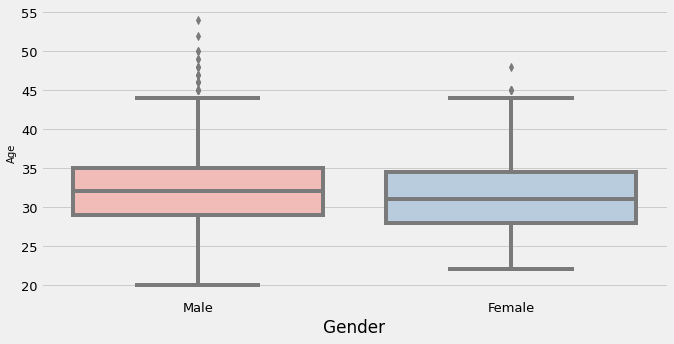

In [42]:
#Data from 2019 
plt.figure(figsize=(10,5))
sns.boxplot(x='Gender',y='Age',data=df_2019,palette='Pastel1')
plt.xticks(fontsize=13)
plt.xlabel("Gender")
plt.yticks(fontsize=13)
plt.ylabel("Age",fontsize=10)
plt.show()

It is also interesting to compare the given statistics to 2019, We see that male to female age gap is somewhat similar but in 2019 dataset Male age bin is between 30-35 in 2020 dataset maximum age increased which might be attributed to increased number of respondents. 

We also see that there was no Diverse Classification which shows just how much the trend for Gender Nutrality has affected the classification of Sex.

#### 3.5 How does Gender affect salary? Is there a pay gap? 

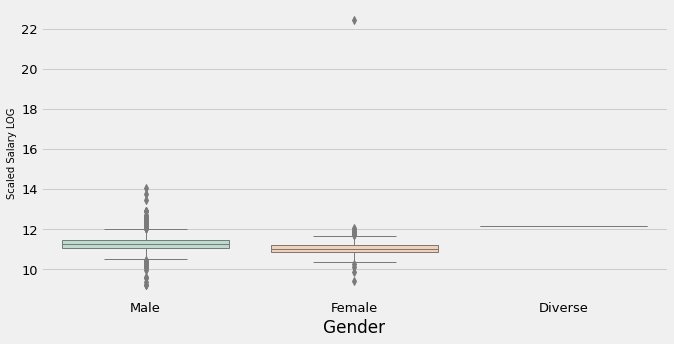

In [43]:
#Since the salary is in log10 we need to convert it to see the real data
plt.figure(figsize=(10,5))
sns.boxplot(x='Gender',y=np.log(df_2020_copy['Total_Salary']),data=df_2020_copy,palette='Pastel2',linewidth=1)
plt.xticks(fontsize=13)
plt.xlabel("Gender")
plt.yticks(fontsize=13)
plt.ylabel("Scaled Salary LOG",fontsize=10)
plt.show()

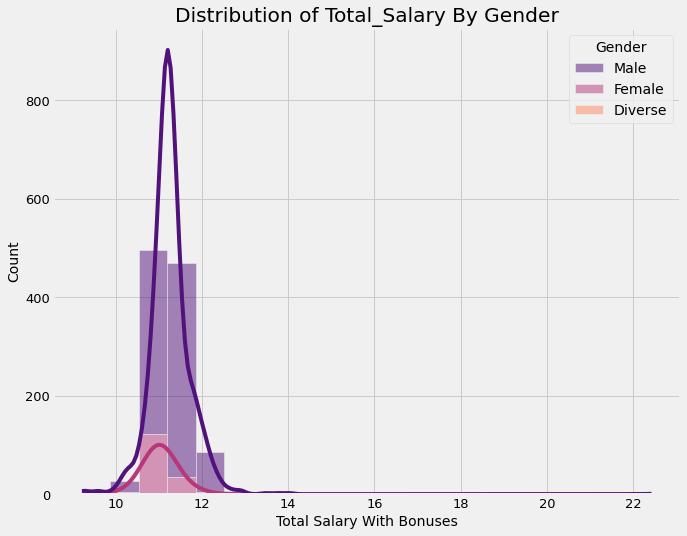

In [44]:
plt.figure(figsize=(10,8))
sns.histplot(x=np.log(df_2020_copy['Total_Salary']),data=df_2020,
             bins=20, kde=True, hue='Gender',multiple="stack",palette='magma')
plt.xticks(fontsize=13)
plt.xlabel("Total Salary With Bonuses",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Count",fontsize=14)
plt.title('Distribution of Total_Salary By Gender')
plt.show()

What we see here is that the salary distribution Between Males and females is not the same, we see that female salaries. but there is not a huge difference. We also see that in Males category there are far more respondandts that have above the standard/average salary. 

This might be cause of various factors not only due to the sex of the person, as we saw above Females are relatively younger and thus due to their lack of experience compared to men they might be getting less salaries or it could be due to position differencies.
To understand if there is a pay gap we need to analyse a certain position for gender and expereince and see the results (chart below) 

Since we see the general trend but are not sure whether the difference is due to gender or due to the position one occupies we can take a closer look at most popular position 'Software Engineer' and analyse whether gender and expereince have affect on salary

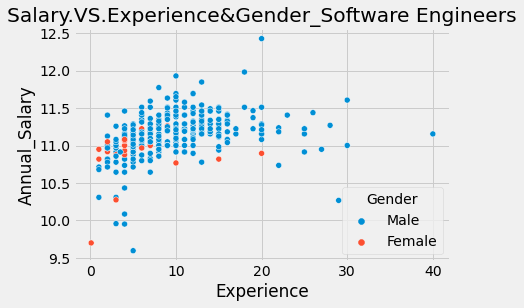

<Figure size 1440x1440 with 0 Axes>

In [45]:
#Gender & Experience VS Salary (Software ENG)
df_soft_eng =df_2020_copy[df_2020_copy['Position']=='Software Engineer']
ax = sns.scatterplot(x = 'Experience', y = np.log(df_soft_eng['Annual_Salary']),hue= 'Gender', data = df_soft_eng)
plt.figure(figsize=(20,20))
ax.set_title('Salary.VS.Experience&Gender_Software Engineers')
plt.show(ax)

From the scatterplot above we see that females have less experience as software engineers compared to males, but for the same experience get less pay than males and males are on the higher salary axis for the same experience which shows that there could be a general pay gap in the industry and needs futher analysis.

#### 3.6 How much experience one needs to have to have Senior Level psoition?

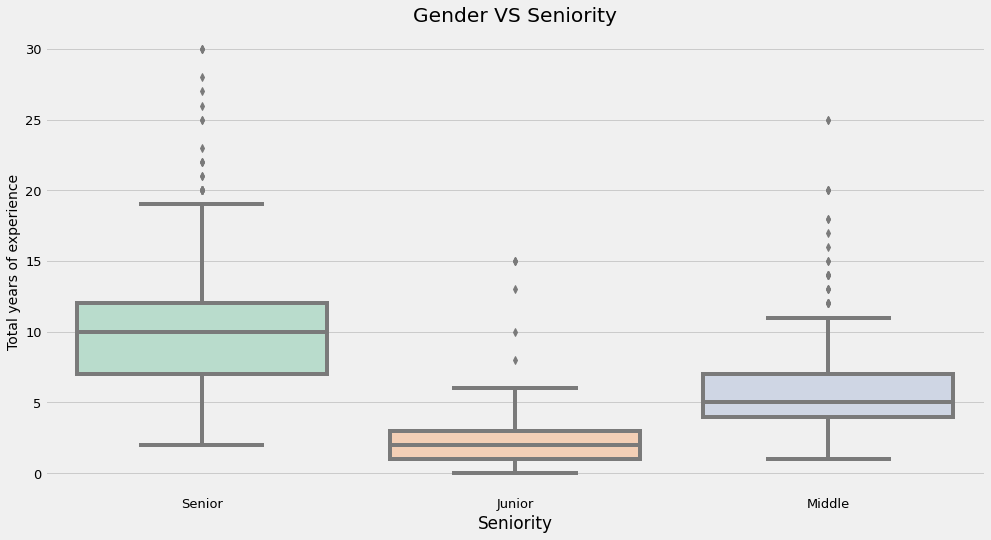

In [46]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_2020_copy[df_2020_copy['Seniority level'].isin(['Senior','Junior','Middle'])],
           x='Seniority level',y='Experience',palette='Pastel2')
plt.xticks(fontsize=13)
plt.xlabel("Seniority")
plt.title('Gender VS Seniority')
plt.yticks(fontsize=13)
plt.ylabel("Total years of experience",fontsize=14)
plt.show()

Based on the graph below we see that Senior level position requires at least from 8-14 years of expereince, where Junior Level position can be occupied by persons with 0 experience.
As for Mid level postions based on the graph above we see that experience of 4 to 8 years is enough after which mid level positions are scarce and on moves to Senior level positions. Outliers show that some correspondents even though with many years of expereince still occupy mid level positions. 

#### 3.6 How old does one should be to have Senior Level psoition?

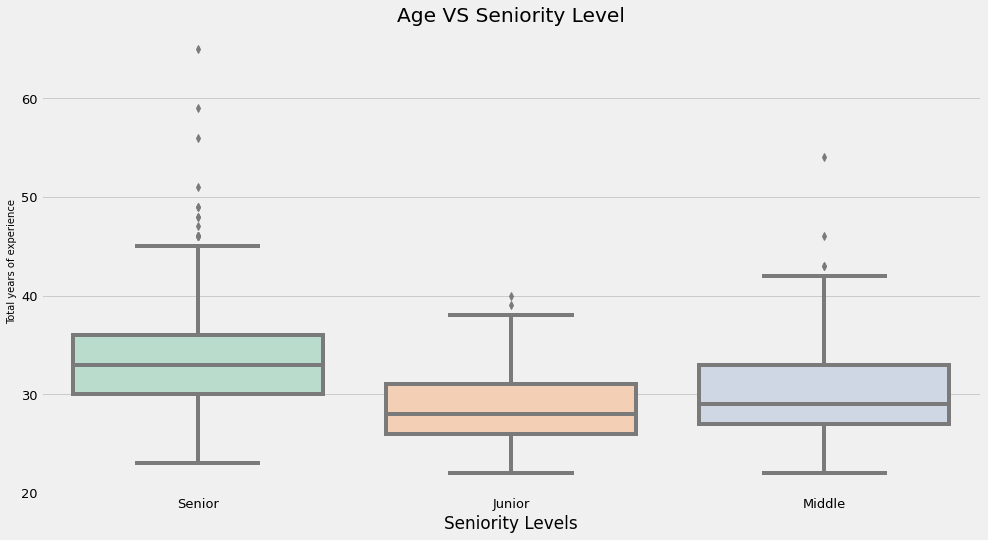

In [47]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_2020_copy[df_2020_copy['Seniority level'].isin(['Senior','Junior','Middle'])],
           x='Seniority level',y='Age',palette='Pastel2')
plt.xticks(fontsize=13)
plt.xlabel("Seniority Levels")
plt.yticks(fontsize=13)
plt.ylabel("Total years of experience",fontsize=10)
plt.title('Age VS Seniority Level')
plt.show()

We see that Minimum age is 20. We also see that in order to be ar Senior level one must be at least 30 years old.

As for junior level positions they start at the lowest threshold and go up to 30-32. 

Middle level positions can be occupied from 22 +, and go up to 54 but 54 is an outlier, main trend is that it goes up to at least 35.Average age is 31 and people in their late 20's and early 30s take up this roles ones who are still young to be seniors. 


In [48]:
df_2020_copy[df_2020_copy['Seniority level']=='Middle'].Age.describe()

count    326.000000
mean      30.177914
std        4.580790
min       22.000000
25%       27.000000
50%       29.000000
75%       33.000000
max       54.000000
Name: Age, dtype: float64

We see that Salary is mainly affected by experience and gender. For expereience less than 10 years salares are on the lowest threshold and for expereience from 10+ salaries start at higher levels. 

For females and males with same expereience salaries dieffer and females have lower salaries than males, this could be due to the different seniority level and positions but trend is visible on the given chart. 

We can in detail analyse dependancies of Experience, Gender and Annual salary based on seniority levels See charts below:


##### Gender & Experiecne VS Salary Based on three main Seniority Levels:

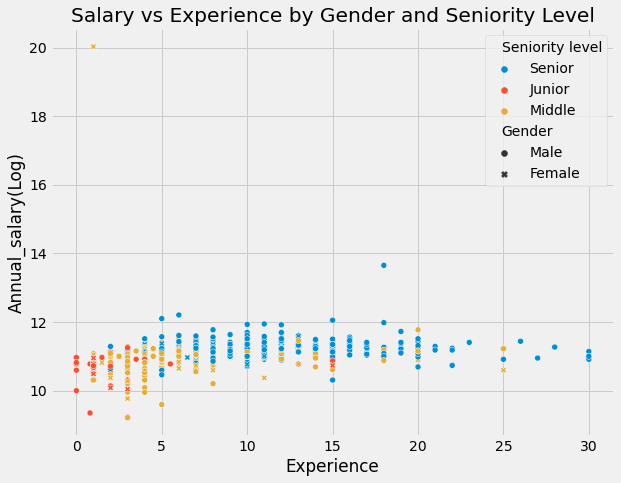

In [49]:
#Seniority: Senior, Middle Junior - Salary vs Gender and expereience
seniority =df_2020_copy[df_2020_copy['Seniority level'].isin(['Senior','Junior','Middle'])]
plt.figure(figsize=(9,7))
ax = sns.scatterplot(x='Experience',y=np.log(seniority['Annual_Salary']), hue=seniority['Seniority level'],style =seniority['Gender'] , data=seniority)
ax.set_title("Salary vs Experience by Gender and Seniority Level")
plt.xlabel("Experience")
plt.ylabel("Annual_salary(Log)")
plt.show(ax)

Based on the graph above: 

1) Senior Level position: Main experience level is 5+ years. Salaries for Senior level positions for same experience level are higher compared to Junior or Mid level positions. Senior level positions are mainly occupied by males. 

2) Middle Level positions: Mid level positions start from 1-5 years of expereicne and are mainly distributed through 1-10 years of expereicne levels. the pay for mid level position compared tp junior level position with same expereince is higher nut lower to senior level positions. females are represented for the given psition but have small number compared to males. For the same expereience level females have less salary than males for mid level position this is not a rule but general observation. 

3) Junior: Expereicence level is low starts from 0 and mainly goes up to 5. We see that there are some data which shows that junior level positions have 15 years of expereince, this could be due to change in career or due to the fact that persons work in a large corporation and were unable to get promoted, or have work expereince but not in given field thus started as juniors. There are a lot more females represented for Junior level positions than in any other. 

#### 3.7 How does company size affect the salary? 

In [50]:
df_2020_copy['Company size'].value_counts()

1000+       399
101-1000    361
11-50       155
51-100      134
up to 10     48
Name: Company size, dtype: int64

we see that most common size of the companies in the given dataset is 1000+ which means people are employed in large corporations

In [51]:
salaries_companysize = df_2020_copy['Total_Salary'].groupby(df_2020_copy['Company size']).mean().astype(int)
salaries_companysize

Company size
1000+           97935
101-1000        83946
11-50           75973
51-100          74930
up to 10    114661314
Name: Total_Salary, dtype: int64

We see that highest avarage salaries are paid in large corporations

#### 3.8 Which are the TOP 5  common business sectors that IT professionals from the survey work at (2019 vs 2020) ?
How has it changed compared to last year?

<AxesSubplot:>

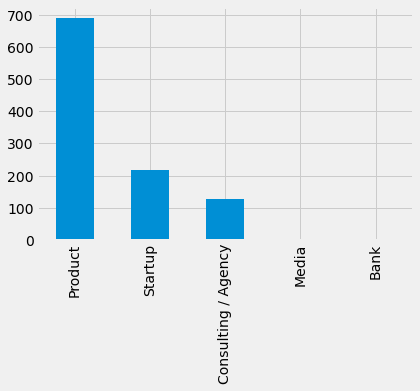

In [52]:
top_10 = df_2020_copy['Company type'].value_counts().sort_values(ascending=False)[:5]
top_10.plot(kind='bar')

<AxesSubplot:>

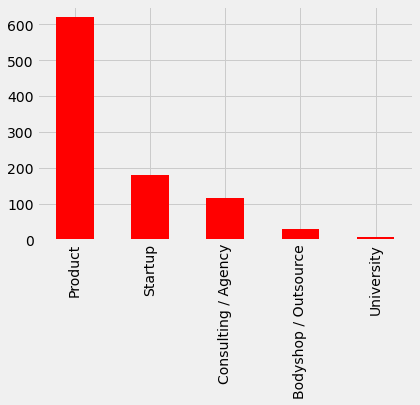

In [53]:
top_10_2019 = df_2019['Company type'].value_counts().sort_values(ascending=False)[:5]
top_10_2019.plot(kind='bar',color='red')

In [54]:
salaries_companysize = df_2020_copy['Annual_Salary'].groupby(df_2020_copy['Company type']).mean().astype(int).sort_values(ascending=False)
salaries_companysize.head(10)

Company type
Startup           2385296
Concern            120000
Cloud              120000
Corporation        113000
eCommerce          110000
Automotive         108000
Corporation        105000
Multinational       90000
Media               86466
Enterprise          85000
Name: Annual_Salary, dtype: int64

We see that "Product" type companies take up the majority. which means that poeple who took part in the survey mainly work in large organisations who develop/creat products. second majority interviewed works at startups. 

Compared to 2019 the categorization has become much more specific since in 2020 dataset we have far more categorical values, but the main industry "Product" and "Startup" are unchanged.

The last two positions have changed, in 2020 banks have taken place of Universities, which might be due to teh surbey correspondants choice, or due to global trends of digitalisation.

As for the salaries the average salaries are high for startups which might be due to the fact that startups require high quality talents to create innovations whih in return requires high salaries to get talented tech professionals to become part of startup firms.



#### 3.8 What features have the highest affect on the salary?

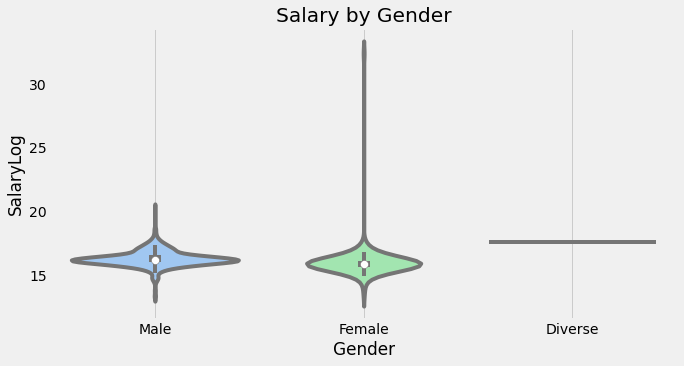

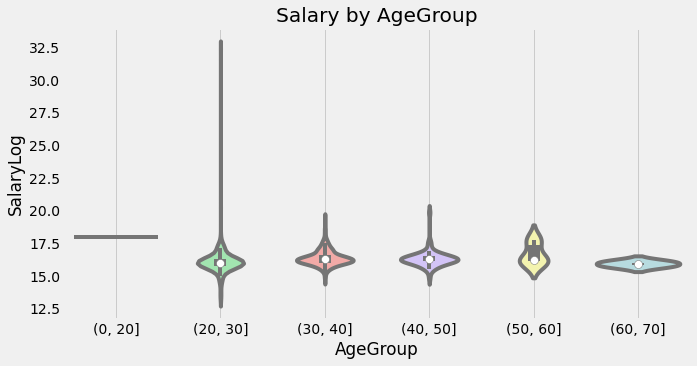

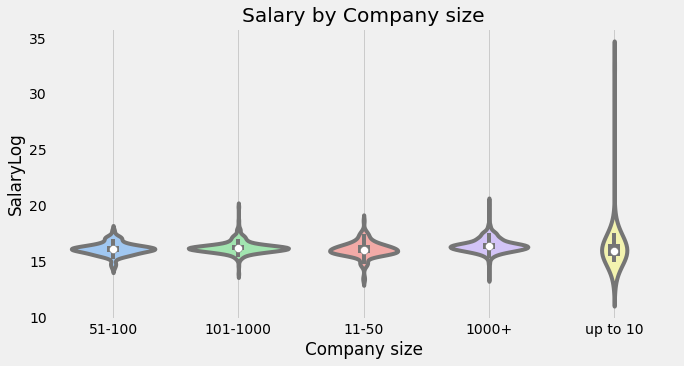

In [55]:
# dependency of salary on the following features:
df_2020_copy['AgeGroup'] = pd.cut(df_2020_copy.Age, bins=[0,20,30,40,50,60,70])
my_features = ['Gender',  'AgeGroup', 'Company size']
df_2020_copy['SalaryLog'] = np.log2(df_2020_copy['Total_Salary'])
for f in my_features:
    plt.style.use('seaborn-pastel')
    plt.figure(figsize=(10,5))
    sns.violinplot(data=df_2020_copy, x=f, y='SalaryLog')
    plt.grid()
    plt.title('Salary by ' + f)
    plt.show()

#### 3.9 How did COVID affect IT market 2020?

In [56]:
lost_job = df_2020_copy[df_2020_copy['lost_job_covid']!='No']
lost_job.shape

(62, 22)

we see that total of 62 jobs were lost or changed due to covid-19.

Text(0.5, 1.0, 'Company Type')

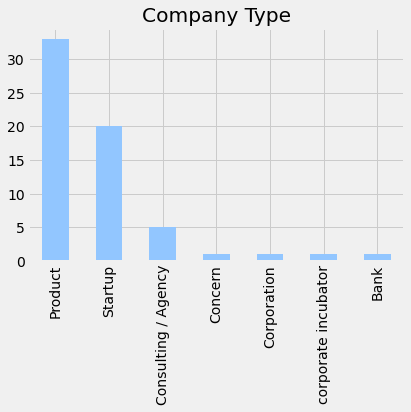

In [57]:
lost_job['Company type'].value_counts().plot(kind='bar')
plt.title('Company Type')

We see that main companies that had to let employees go were Products and stratups.

Text(0.5, 1.0, 'Position')

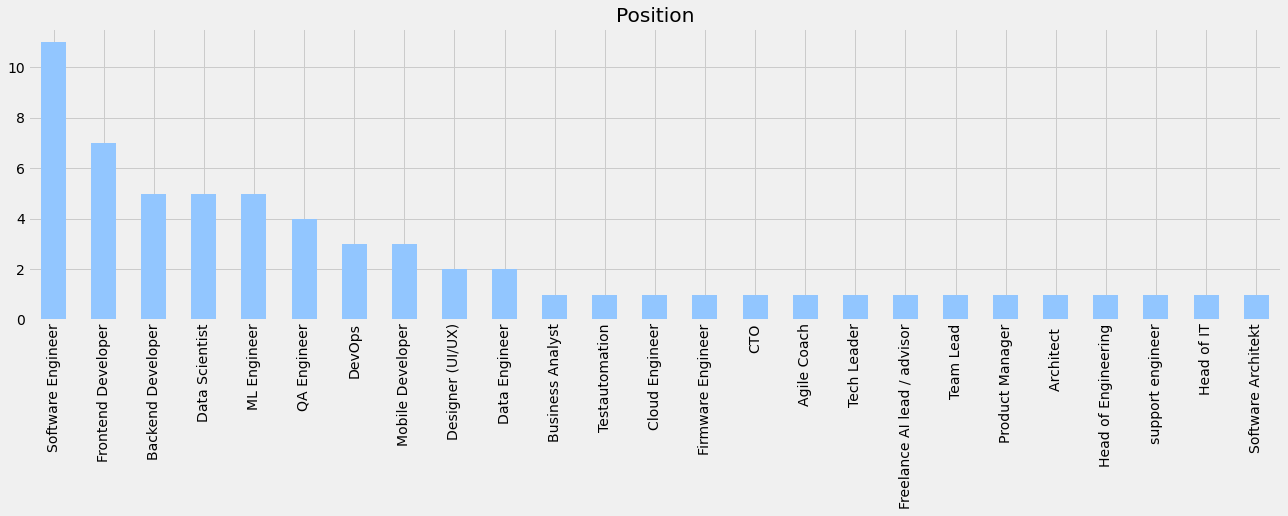

In [58]:
lost_job['Position'].value_counts().plot(kind='bar',figsize=(20,5))
plt.title('Position')

We see that mainly Software engineers  frontend devs and backend lost jobs due to covid. Positions that could be substituted and are not scarce on the job market.  

Text(0.5, 1.0, 'Seniority level')

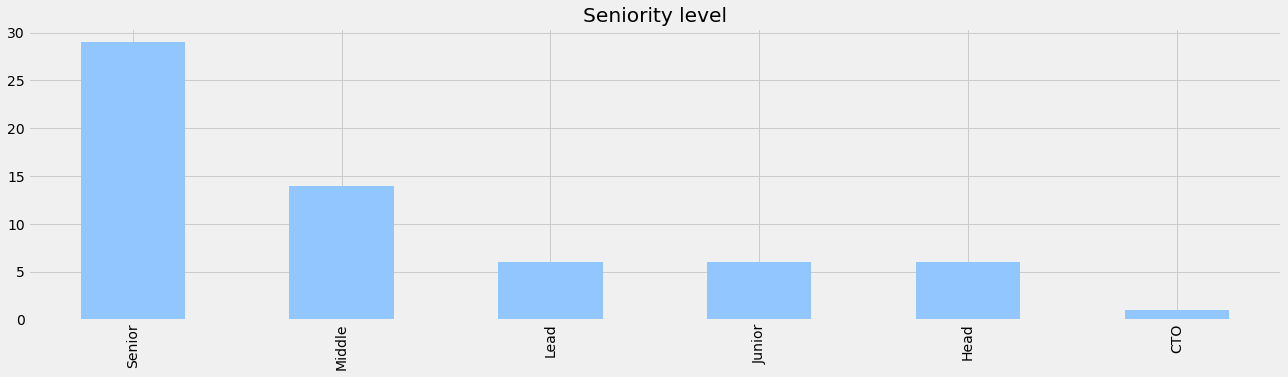

In [59]:
lost_job['Seniority level'].value_counts().plot(kind='bar',figsize=(20,5))
plt.title('Seniority level')

We see that mainly seniors kost jobs due to covid, we can assume that it is due to there higher salaries, since covid had strong economic reprecautions on companies. 

#### 3.10 Which are the most popular Programming Languages for 2020? 


In [61]:
langs = [langs['Main_Lang/Tech']!='none']
langs['Main_Lang/Tech'] = langs['Main_Lang/Tech'].str.lower()
langs['Main_Lang/Tech'] = langs['Main_Lang/Tech'].str.strip()

NameError: name 'langs' is not defined

In [ ]:
langs['Main_Lang/Tech'].value_counts()[:10].plot(kind='pie',figsize=(10,10),autopct='%1.1f%%') 
top_10_langs_list = langs['Main_Lang/Tech'].value_counts()[:10].index.tolist()

In [ ]:
top_10_langs_list

We see that Java , python and javascript are the most popular languages,

In [ ]:
top_10_langs = df_2020_copy[df_2020_copy['Main_Lang/Tech'].isin(top_10_langs_list)]
salaries_top_10_langs = top_10_langs.groupby('Main_Lang/Tech')['Annual_Salary'].mean().sort_values(ascending=False)
salaries_top_10_langs

In [ ]:
salaries_top_10_langs.plot(kind='bar',figsize=(10,10),color='red')
plt.title('Salaries for top 10 Languages')

The highest average salary for top 10 most popular langiages is in SCALA.

## 4. Salary Prediction using regression

Given dataset is based on the survey, there are many factors to take into account. The dataset does not have enough data for precise predictions and is based on the subjectove survey this may contribute to low regression score.

<AxesSubplot:>

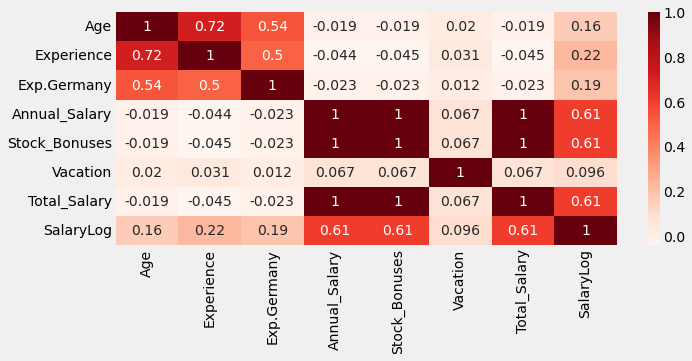

In [62]:
hm = df_2020_copy.corr()
fig = plt.figure(figsize = (10,4))
sns.heatmap(hm,cmap = 'Reds', annot = True)

We see that in numeric categories this features have the highest correlation with salaryLog (We do not look at salary bonuses and total saalry_
1) Experience -0.22
2) Experience Germany -0.19
3) Age - 0.16

#### 4.1 Select and  Convert Categorical Values to Dummies

In [63]:
df_top_5_positions =df_2020_copy['Position'].value_counts()[:5].sort_values(ascending=False)
df_top_5_positions

Software Engineer     348
Backend Developer     153
Data Scientist         91
Frontend Developer     80
QA Engineer            63
Name: Position, dtype: int64

In [64]:
df_new = df_2020_copy[df_2020_copy['Position'].isin(['Software Engineer','Backend Developer','Data Scientist','Frontend Developer','QA Engineer'])]
df_new = df_new[df_new['Seniority level'].isin(['Senior','Middle','Lead','Junior','Head'])]
df_new = df_new[df_new['City'].isin(['Munich','Berlin','Frankfurt','Hamburg','Stutgart'])]
df_new['Main_Lang/Tech'] = df_new['Main_Lang/Tech'].replace('JavaScript','Javascript') 
df_new = df_new[df_new['Main_Lang/Tech'].isin(['Java','Python','PHP','Javascript','Go','Scala','Ruby','C++'])]

In [65]:
df_new.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position', 'Experience',
       'Exp.Germany', 'Seniority level', 'Main_Lang/Tech', 'Other_Lang/Tech',
       'Annual_Salary', 'Stock_Bonuses', 'Vacation', 'Employment status',
       'Сontract duration', 'Language', 'Company size', 'Company type',
       'lost_job_covid', 'Total_Salary', 'AgeGroup', 'SalaryLog'],
      dtype='object')

In [66]:
df_new_1 = pd.get_dummies(df_new, columns = ['Position','Seniority level','City','Main_Lang/Tech','Gender','Employment status','Language','Company size'])
df_new_1 = df_new_1.drop(columns=['Other_Lang/Tech','Stock_Bonuses','Vacation','Сontract duration',  'Company type',
       'lost_job_covid', 'Total_Salary', 'SalaryLog', 'AgeGroup','Timestamp'])

#### 4.2 Split Test and Training data

In [72]:
from sklearn.linear_model import LinearRegression


x = df_new_1.drop('Annual_Salary',axis =1).values

y = df_new_1['Annual_Salary']
#It creates 4 tables:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, train_size =0.8, test_size = 0.2, random_state =15)

lm = LinearRegression(fit_intercept = True )
lm.fit(X_train,Y_train)# this is where we put the betas
Y_pred = lm.predict(X_train)



#### 4.3 Plot Regression Line

Text(0, 0.5, 'Predicted')

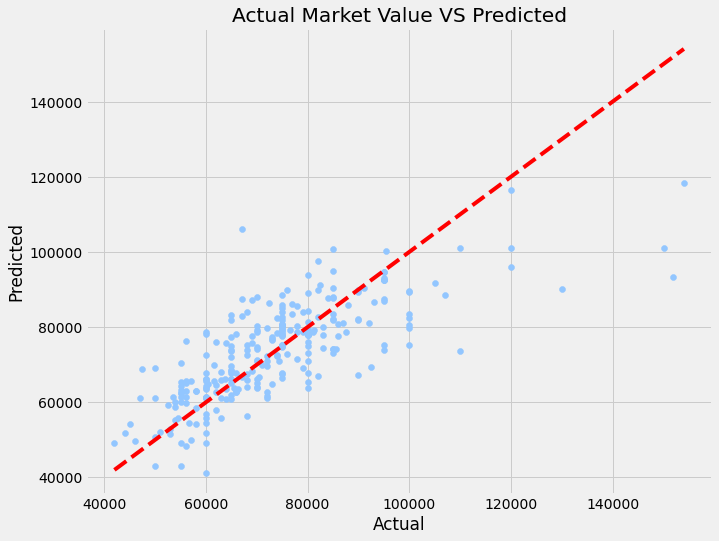

In [74]:
plt.figure(figsize =(10,8))
plt.scatter(Y_train, Y_pred)
plt.plot([Y_train.min(), Y_train.max()], 
         [Y_train.min(), Y_train.max()], 
         'k--', 
         c = 'red',
         lw = 4);
plt.title("Actual Market Value VS Predicted")
plt.xlabel('Actual')
plt.ylabel('Predicted')



There is not high variance between actual and predicted values of the model.
We see that there are points that are outside of the line and we can assume that since we did not remove outliers from the dataset this are the results of that. Main points are distributed evenly. 

#### 4.4 Analyse the ML Scores

In [ ]:
x2 = df_new_1.drop('Annual_Salary',axis =1)
Inter = lm.intercept_
Coeff = lm.coef_
Coeff = Coeff.reshape(-1,37)
Coeff_df = pd.DataFrame(Coeff, columns =  [x2.columns])
Coeff_df

In [ ]:
#R-Squared value for Train data set
print("R-squared value training data:",round(r2_score(Y_train, Y_pred),3))

R squared is above 50% which means that chosen features have affect on the dependant variable. 
Rsquared shows the relationship between independant and dependant variables. It changes from 0 - 1 . 0 means there is no relationhsip whereas 1 means that the changes in dependant variable are 100% result of independant variables. In our case r squared is = 0.573 -> which means that changes in salaries are 57%% result of changes in our chosen features.

In [ ]:
Y_pred = lm.predict(X_train)
print('the accuracy in testing data is',lm.score(X_test,Y_test))
print('the accuracy in training data is',lm.score(X_train,Y_train))

In [ ]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(Y_train, X_train_sm).fit()
lr.params
lr.summary()

#### Conlusion

The regression model is not dismissable it shows us the independant variable, salaries has strong relationship with our chosen features. We see that not all features chosen have affect on the salary, features that have high P value could be dismissed. 

Linear model works for the given dataset since our r squared is high, but we need more data to make accurate predictions.

## 5. Conclusion

We saw that dataset had some null values and based on their meaning we made sure to fill in columns were fit and drop insignificant number of null values. 

For the purpouses of our analysis it would have been more useful to make drop-down single select questions for those questions that can have them for example : main languages, postions etc. it will give us more accurate understanding in the future. 

We made analysis on the dataset based on the information we had and only took deeper look at top positions, salaries, languages etc. For more detailed understanding e need to investigate more. 

Based on the questions we anwsered above and analysed we can make next conclusions: 

1) Most common position in It is Software Engineer and based on our analysis the trend will only grow. 

2) IT professionals are mainly occupied in central cities such as Berlin, Munich, Frankfurt. Due to the fact that large organisations are located there. 

3) In terms of gender equality IT market has risks, we see that it is predominantely Male dominated field and Females are only starting to enter it.

4) Average age to be able to enter IT industry starts from 20 and goes up to even 66. 

5) We see that even though Machine Learning is not the most popular position it is the highest paid one. This can be attributed to ist specificity and newness and there are not a lot of specialists on the market and are in demand 

6) We see that female represantation grew compared to last year but pay gap is still visible. 

7) There are a lot of positions within IT field that do not require the knowledge of any Languages or Technologies. Which are mainly the managerial positions : Agile Coach, Product Manager, QA Engineer, Sys Admin, Recruiter etc. 

8)Work expereince is not must in IT but seniority level depends upon it higly. For positions above Junior level one must have expereicne of more than 5 years. 

9) In 2020 Most compensated language is SCALA. 

10) In 2020 covid 19 pandemic started which made a lot of companies to fire employees, or a eployees left on their own. We saw that in the given dataset 62 respndants have left or were let go from theior jobs. We saw that they were mainly Seniors and main industry to have the high turnover was product. We can make an educated guess that product companies were unable to sell their products and strtups could not live with high expenses thus they had to make cuts on senior level positions where salaries were high.
